In [1]:
%run dataFormating.ipynb

rmdf152 read_csv success


../Utilities/Preparation.ipynb:2: ParserWarning: Both a converter and dtype were specified for column customData.localplayerguid - only the converter will be used
  "cells": [


gformEN read_csv success
gformFR read_csv success
temporalities set


FloatProgress(value=0.0, max=401.0)

dataFormating.ipynb:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  "outputs": [


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [3]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [4]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [6]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.82869573532224139

In [7]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.84848919487473706

In [8]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.81674316312870532

Conclusion: Accuracy is around 85%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [9]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [10]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.8087588449034232

In [11]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.81258366800535475

In [12]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.82453624019889082

Conclusion: Accuracy is around 80%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [13]:
allDataClassif.columns

Index([ 'sessionsCount',    'scorebefore',     'scoreafter', 'scoreundefined',
             'complete',      'configure',          'craft',          'death',
                'equip',        'unequip',            'add',         'remove',
              'gotourl',         'pickup',          'reach',        'restart',
           'selectmenu',          'start',     'maxChapter',     'efficiency',
         'thoroughness',            'fun', 'completionTime',                0,
                      1,                2,                3,                4,
                      5,                6,                7,                8,
                      9,               10,               11,               12,
                     13,               14,    'anonymousID'],
      dtype='object')

## Can the score of a player be predicted with their RedMetrics data

In [14]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0].drop("scoreafter", axis = 1)
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Center and scale data
features = preprocessing.scale(features)

array([  5.14308664e-01,  -2.69653916e-01,  -6.87194927e-02,
         2.49762022e-01,   1.91719005e-01,   1.61899326e-02,
        -8.11157854e-01,  -2.77628407e+00,  -8.69719433e+01,
        -6.72799872e-01])

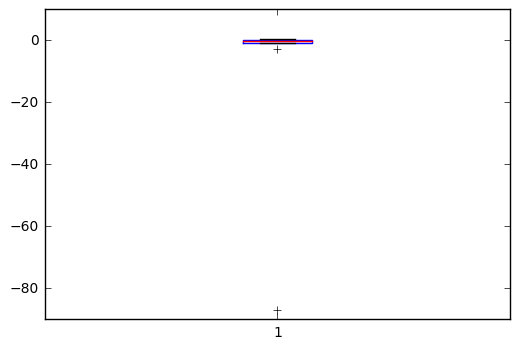

In [15]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data (30/01/2018)

In [16]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0].drop("scoreafter", axis = 1)
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([  8.31947750e-01,  -3.12368805e-01,  -3.61524234e-02,
         8.49795788e-02,   8.90522360e-02,   1.41231920e-01,
        -9.80760225e-01,  -2.20955451e+00,  -6.89306332e+01,
        -5.33258805e-01])

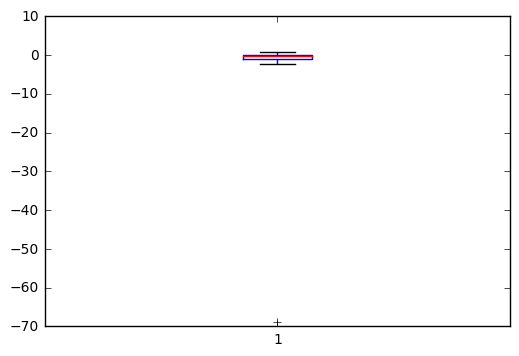

In [17]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [18]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + list(range(15))]
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([  4.51582872e-01,  -2.51281640e-01,  -9.59704619e-02,
         1.79143498e-01,   2.71698285e-01,   7.41510106e-02,
        -3.85263335e-01,  -2.14301406e+00,  -9.68460221e+01,
        -5.54684574e-01])

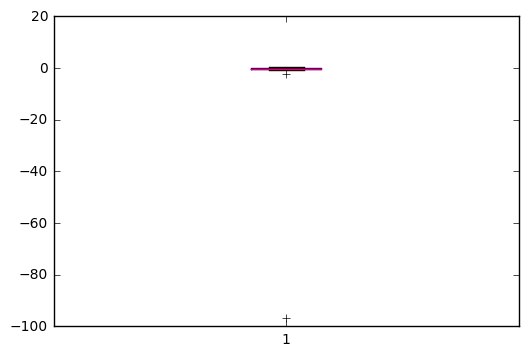

In [19]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression (02/02/2018)

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [20]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features.loc[:,"sessionsCount":"completionTime"]
target = anonymousData[anonymousData["scoreafter"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-2.34722222, -1.15363512, -0.08787219, -1.03765432, -0.13927469,
       -1.74364561, -0.49441505, -1.03765432, -6.42222222, -0.27222222])

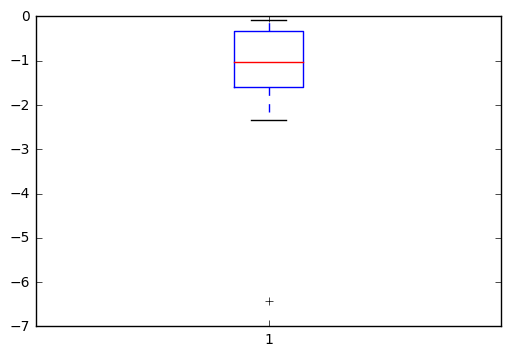

In [21]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [22]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"completionTime"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-0.72565158, -0.97831978, -0.10432099, -0.20454545, -0.00383142,
       -0.00271003, -0.00653595, -0.0100823 , -0.19790498, -0.19790498])

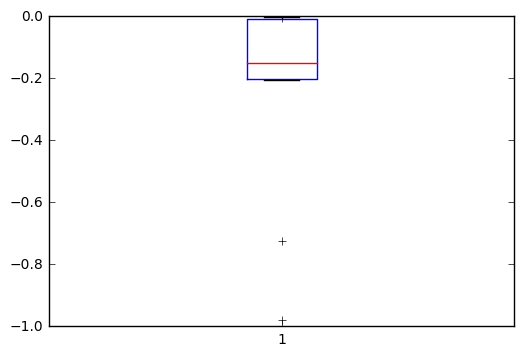

In [23]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly

In [24]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreafter"] >= 0]
    features = features.iloc[:,24:37]
    target = anonymousData[anonymousData["scoreafter"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Mikael\Anaconda3\envs\conda-env-python3-py\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, Runti

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
Mean,0.830070,0.713520,0.650350,0.533916,0.469231,0.483333,0.733333,0.621445,0.733333,0.804429,...,0.756760,0.917949,0.883333,0.866667,0.733333,0.569580,0.413403,0.733333,0.937179,0.866667
Var,0.081411,0.138514,0.141024,0.153366,0.097210,0.143372,0.062361,0.088401,0.097183,0.099456,...,0.120904,0.052767,0.040825,0.040825,0.161589,0.078217,0.072287,0.192931,0.057962,0.040825


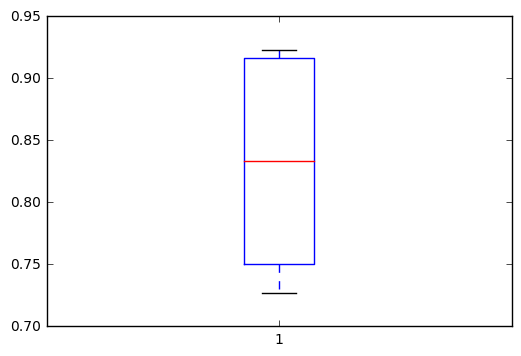

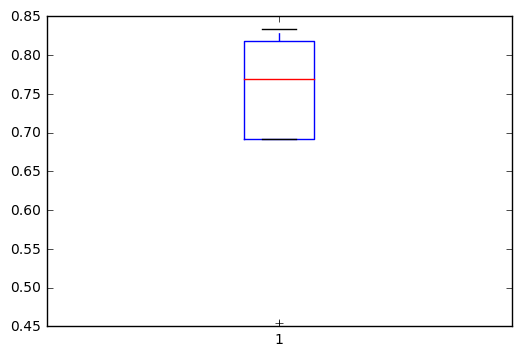

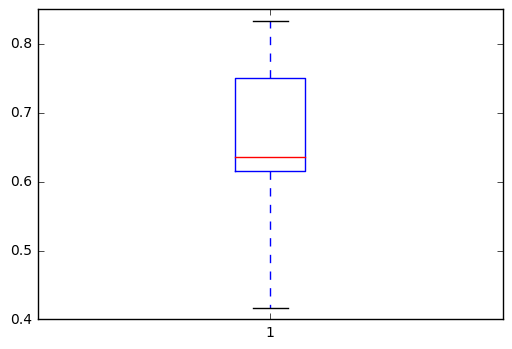

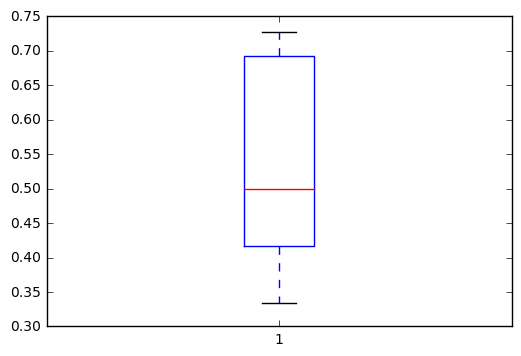

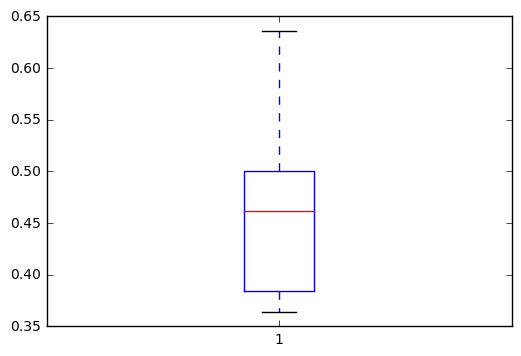

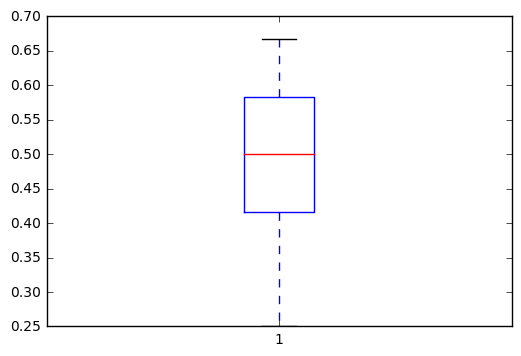

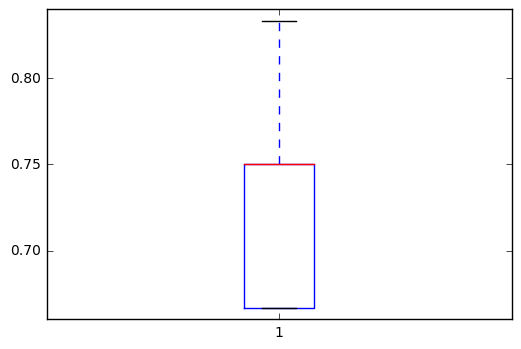

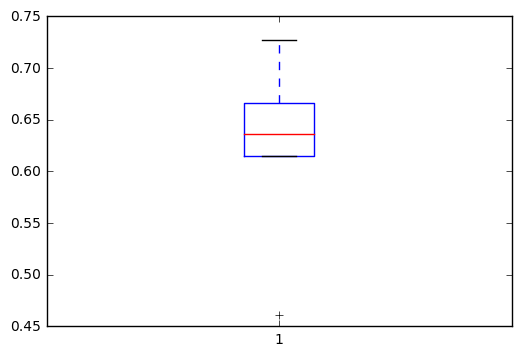

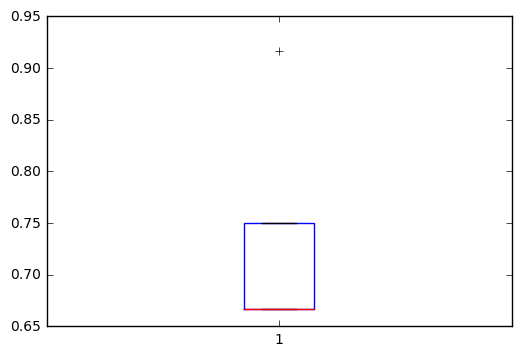

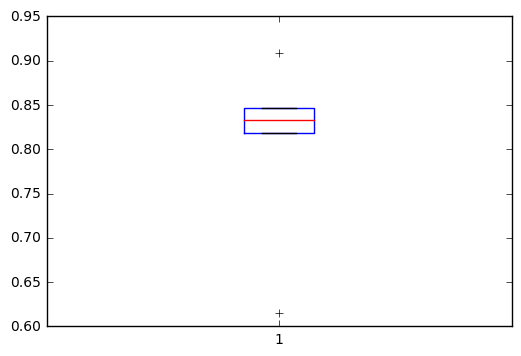

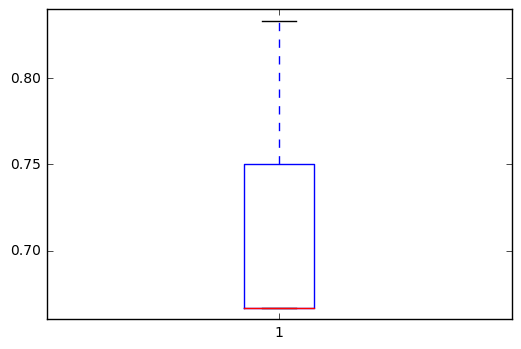

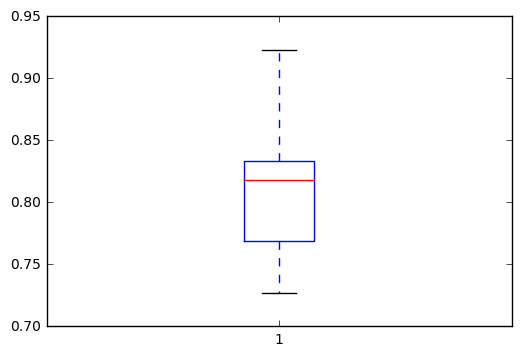

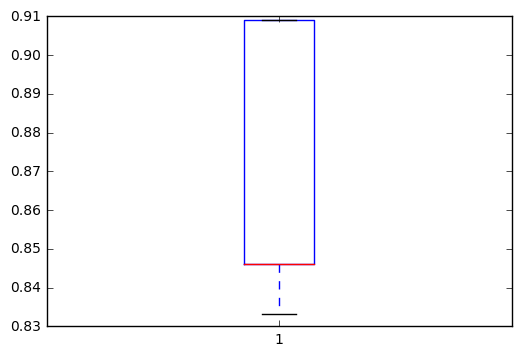

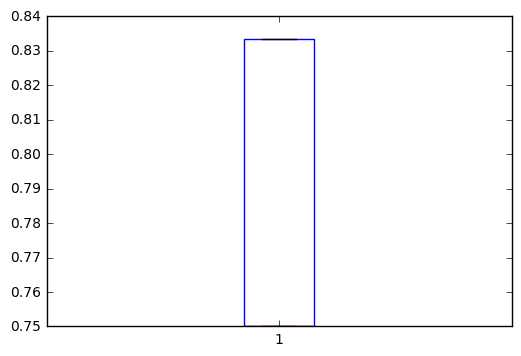

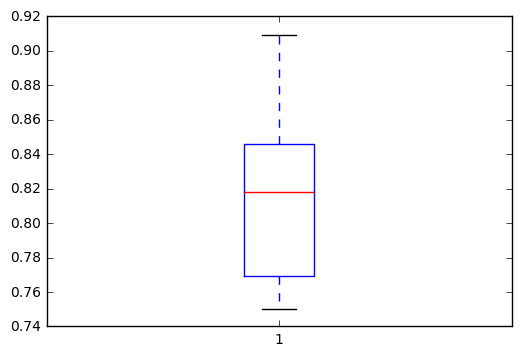

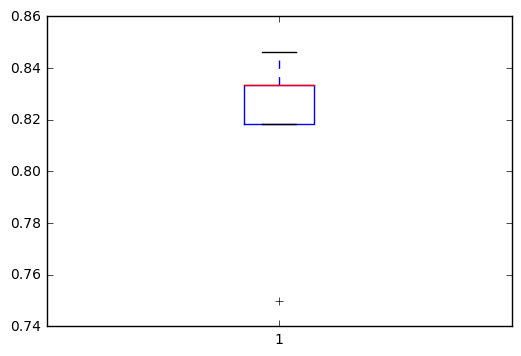

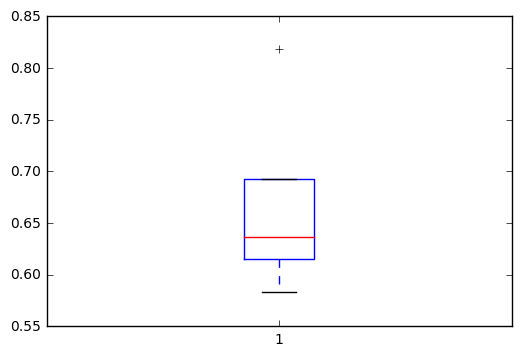

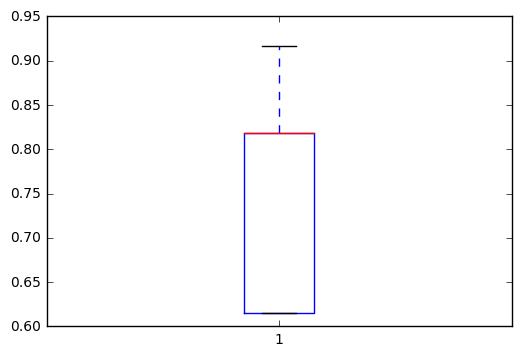

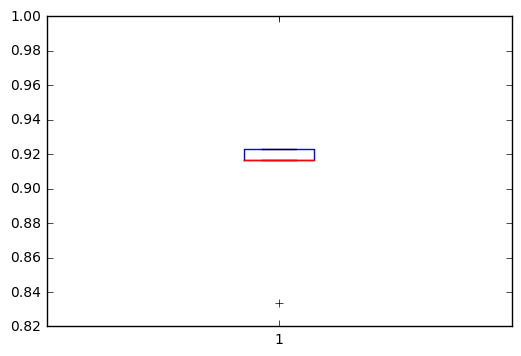

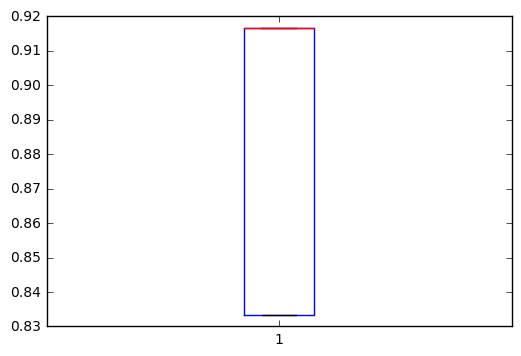

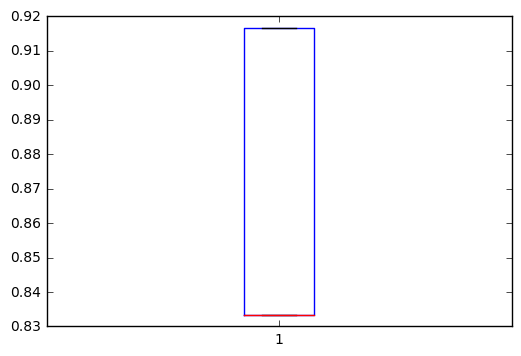

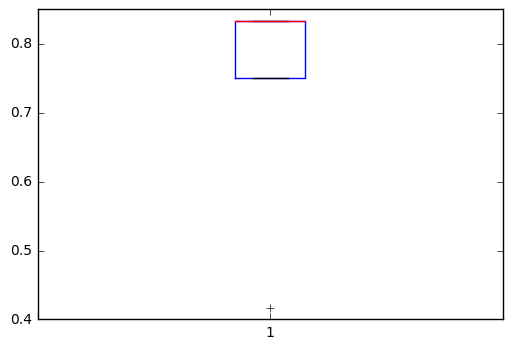

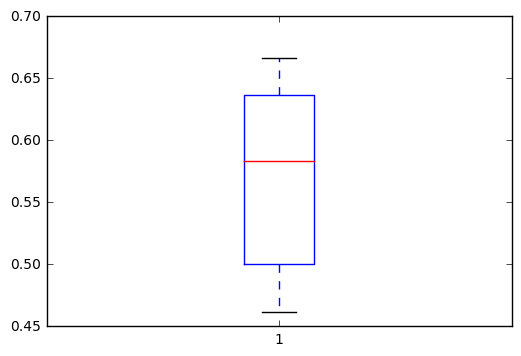

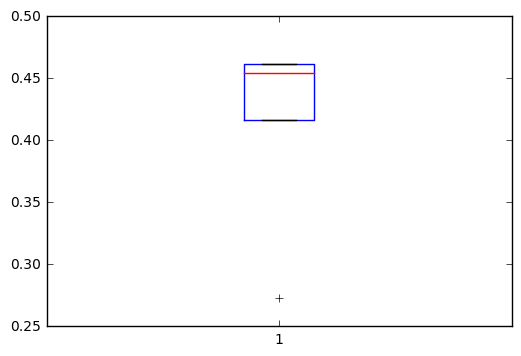

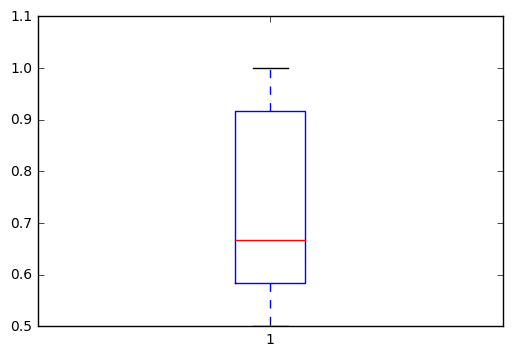

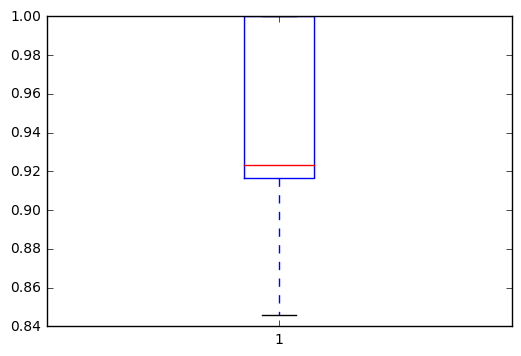

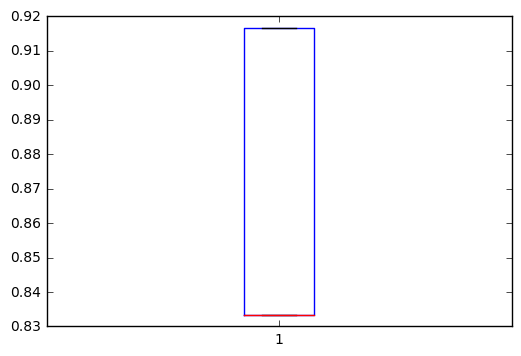

In [25]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for questionNb in range(27):
    questionTag = "Q" + str(questionNb + 1)
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (30/01/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

### Hard questions Q17-Q21-Q23-Q24

0.60904761904761895

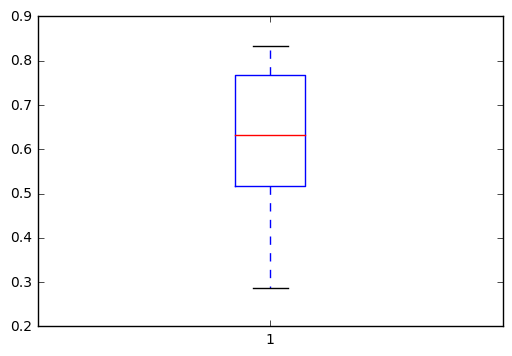

In [26]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"androidPlay"]], axis=1)
target = anonymousData.loc[:,["Q17", "Q21", "Q23", "Q24"]].astype(int).sum(axis=1)
target = target.apply(lambda x: 0 if x < 3 else 1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)
    
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

In [27]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.78045112781954884

Conclusion: Low quality prediction (1/02/2018)

### Biobrick symbol recognition Q3 -> Q10

In [28]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"androidPlay"]], axis=1)
target = anonymousData.loc[:,"Q3":"Q10"].astype(int).sum(axis=1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

0.14090578324252184

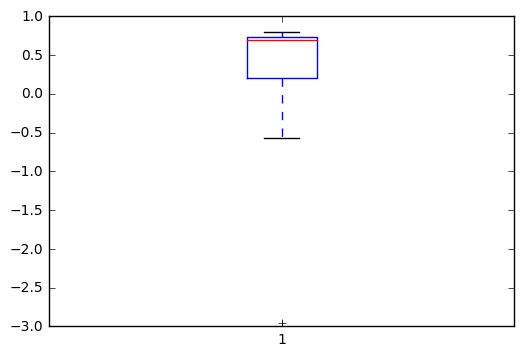

In [29]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions Q1->Q7-Q9-Q10-Q15-Q16-Q19-Q20

In [30]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"androidPlay"]], axis=1)
target = anonymousData.loc[:,["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q9", "Q10", "Q15", "Q16", "Q19", "Q20"]].astype(int).sum(axis=1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

0.42734054146318129

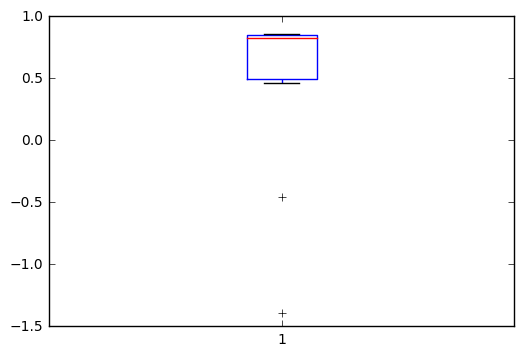

In [31]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

(array([  2.,   0.,   1.,   2.,   2.,   1.,   2.,   2.,   1.,   2.,   8.,
         11.,  26.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Patch objects>)

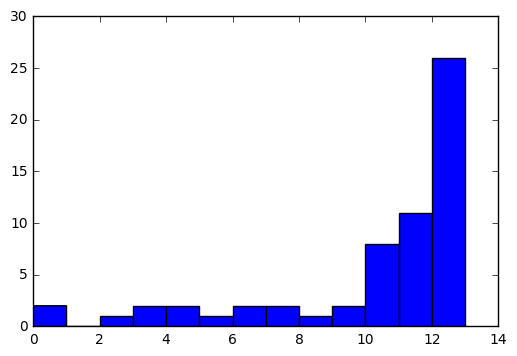

In [32]:
plt.hist(target, bins = range(14))

Conclusion: Inconclusive (01/02/2018)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [33]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = anonymousData.loc[:,"gameInterest":"gender_Prefer not to say"]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-1.4334895501992797

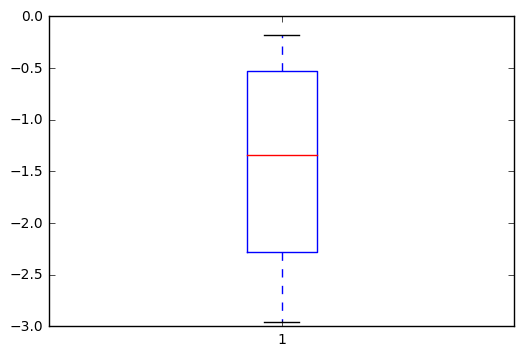

In [34]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=10000, alpha=10)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.76963350785340312

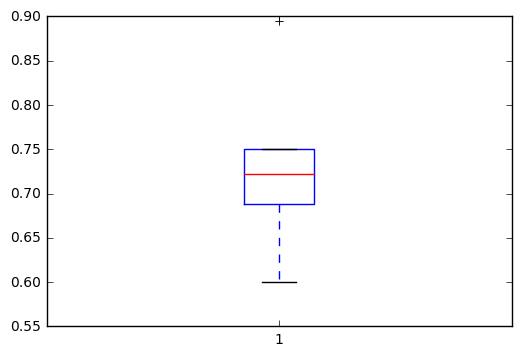

In [35]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()
sum(target)/len(target)

Conclusion: No (01/02/2018)

### From the after questionnaire

In [36]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = anonymousData.loc[:,"gameInterest":"gender_Prefer not to say"]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-3.1828345975331378

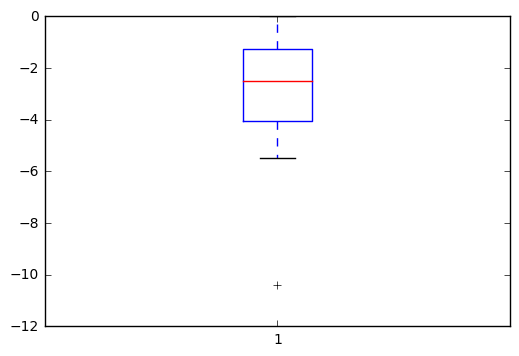

In [37]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=1000000)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.6004761904761905

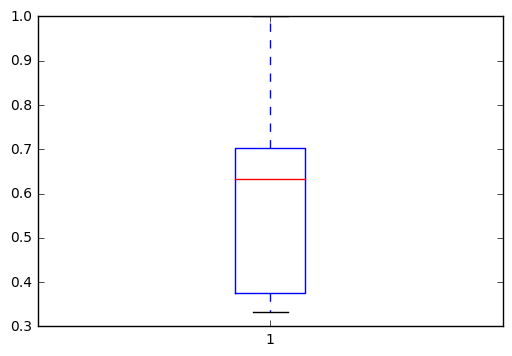

In [38]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: No (01/02/2018)